In [ ]:
import warnings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
warnings.filterwarnings("ignore")

In [ ]:
df = pd.read_csv('/content/amazon_delivery.csv')

In [ ]:
df.head()

,Order_ID,Agent_Age,Agent_Rating,Store_Latitude,Store_Longitude,Drop_Latitude,Drop_Longitude,Order_Date,Order_Time,Pickup_Time,Weather,Traffic,Vehicle,Area,Delivery_Time,Category
0,ialx566343618,37,4.9,22.745049,75.892471,22.765049,75.912471,2022-03-19,11:30:00,11:45:00,Sunny,High,motorcycle,Urban,120,Clothing
1,akqg208421122,34,4.5,12.913041,77.683237,13.043041,77.813237,2022-03-25,19:45:00,19:50:00,Stormy,Jam,scooter,Metropolitian,165,Electronics
2,njpu434582536,23,4.4,12.914264,77.678400,12.924264,77.688400,2022-03-19,08:30:00,08:45:00,Sandstorms,Low,motorcycle,Urban,130,Sports
3,rjto796129700,38,4.7,11.003669,76.976494,11.053669,77.026494,2022-04-05,18:00:00,18:10:00,Sunny,Medium,motorcycle,Metropolitian,105,Cosmetics
4,zguw716275638,32,4.6,12.972793,80.249982,13.012793,80.289982,2022-03-26,13:30:00,13:45:00,Cloudy,High,scooter,Metropolitian,150,Toys


In [ ]:
df.tail()

,Order_ID,Agent_Age,Agent_Rating,Store_Latitude,Store_Longitude,Drop_Latitude,Drop_Longitude,Order_Date,Order_Time,Pickup_Time,Weather,Traffic,Vehicle,Area,Delivery_Time,Category
43734,jlxf819993117,30,4.8,26.902328,75.794257,26.912328,75.804257,2022-03-24,11:35:00,11:45:00,Windy,High,motorcycle,Metropolitian,160,Home
43735,aevx342135787,21,4.6,0.000000,0.000000,0.070000,0.070000,2022-02-16,19:55:00,20:10:00,Windy,Jam,motorcycle,Metropolitian,180,Jewelry
43736,xnek760674819,30,4.9,13.022394,80.242439,13.052394,80.272439,2022-03-11,23:50:00,00:05:00,Cloudy,Low,scooter,Metropolitian,80,Home
43737,cynl434665991,20,4.7,11.001753,76.986241,11.041753,77.026241,2022-03-07,13:35:00,13:40:00,Cloudy,High,motorcycle,Metropolitian,130,Kitchen
43738,nsyz997960170,23,4.9,23.351058,85.325731,23.431058,85.405731,2022-03-02,17:10:00,17:15:00,Fog,Medium,scooter,Metropolitian,180,Cosmetics


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43739 entries, 0 to 43738
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Order_ID         43739 non-null  object 
 1   Agent_Age        43739 non-null  int64  
 2   Agent_Rating     43685 non-null  float64
 3   Store_Latitude   43739 non-null  float64
 4   Store_Longitude  43739 non-null  float64
 5   Drop_Latitude    43739 non-null  float64
 6   Drop_Longitude   43739 non-null  float64
 7   Order_Date       43739 non-null  object 
 8   Order_Time       43739 non-null  object 
 9   Pickup_Time      43739 non-null  object 
 10  Weather          43648 non-null  object 
 11  Traffic          43739 non-null  object 
 12  Vehicle          43739 non-null  object 
 13  Area             43739 non-null  object 
 14  Delivery_Time    43739 non-null  int64  
 15  Category         43739 non-null  object 
dtypes: float64(5), int64(2), object(9)
memory usage: 5.3+ MB


In [17]:
df.isnull().sum()

,0
Order_ID,0
Agent_Age,0
Agent_Rating,0
Store_Latitude,0
Store_Longitude,0
Drop_Latitude,0
Drop_Longitude,0
Order_Date,0
Order_Time,0
Pickup_Time,0


In [18]:
df['Agent_Rating'] = df['Agent_Rating'].fillna(df['Agent_Rating'].mean())
df['Weather'] = df['Weather'].fillna('Unknown')

In [19]:
df['Weather'].unique()

array(['Sunny', 'Stormy', 'Sandstorms', 'Cloudy', 'Fog', 'Windy',
       'Unknown'], dtype=object)

In [20]:
df.describe()

,Agent_Age,Agent_Rating,Store_Latitude,Store_Longitude,Drop_Latitude,Drop_Longitude,Delivery_Time
count,43739.000000,43739.00000,43739.000000,43739.000000,43739.000000,43739.000000,43739.000000
mean,29.567137,4.63378,17.210960,70.661177,17.459031,70.821842,124.905645
std,5.815155,0.33451,7.764225,21.475005,7.342950,21.153148,51.915451
min,15.000000,1.00000,-30.902872,-88.366217,0.010000,0.010000,10.000000
25%,25.000000,4.50000,12.933298,73.170283,12.985996,73.280000,90.000000
50%,30.000000,4.70000,18.551440,75.898497,18.633626,76.002574,125.000000
75%,35.000000,4.90000,22.732225,78.045359,22.785049,78.104095,160.000000
max,50.000000,6.00000,30.914057,88.433452,31.054057,88.563452,270.000000


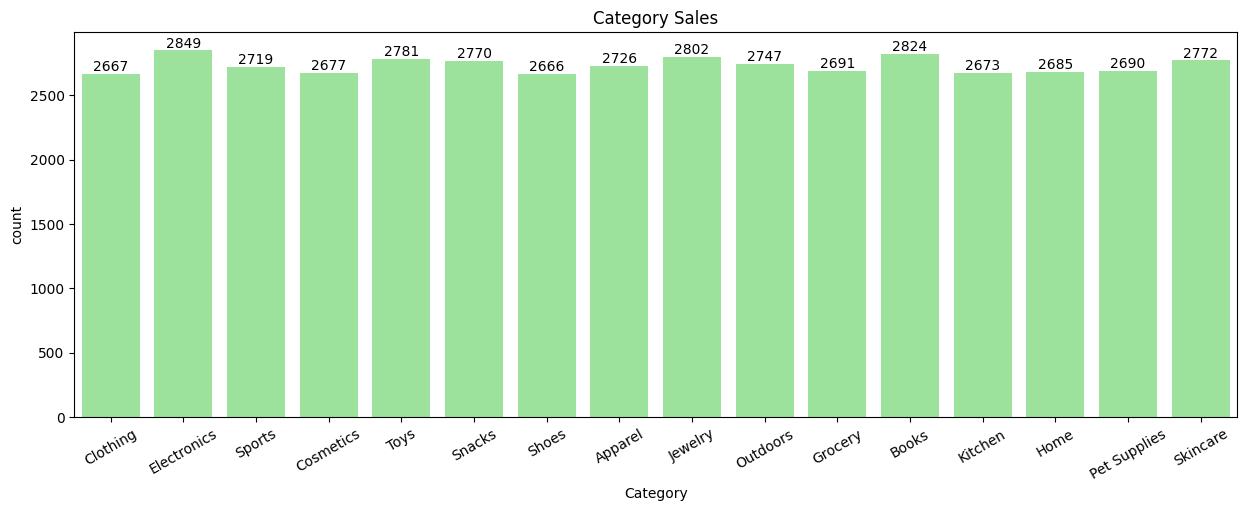

In [23]:
plt.figure(figsize=(15,5))
ax = sns.countplot(x='Category', data=df, color='lightgreen')
ax.bar_label(ax.containers[0])
plt.title('Category Sales')
ax.tick_params(axis='x', rotation=30)

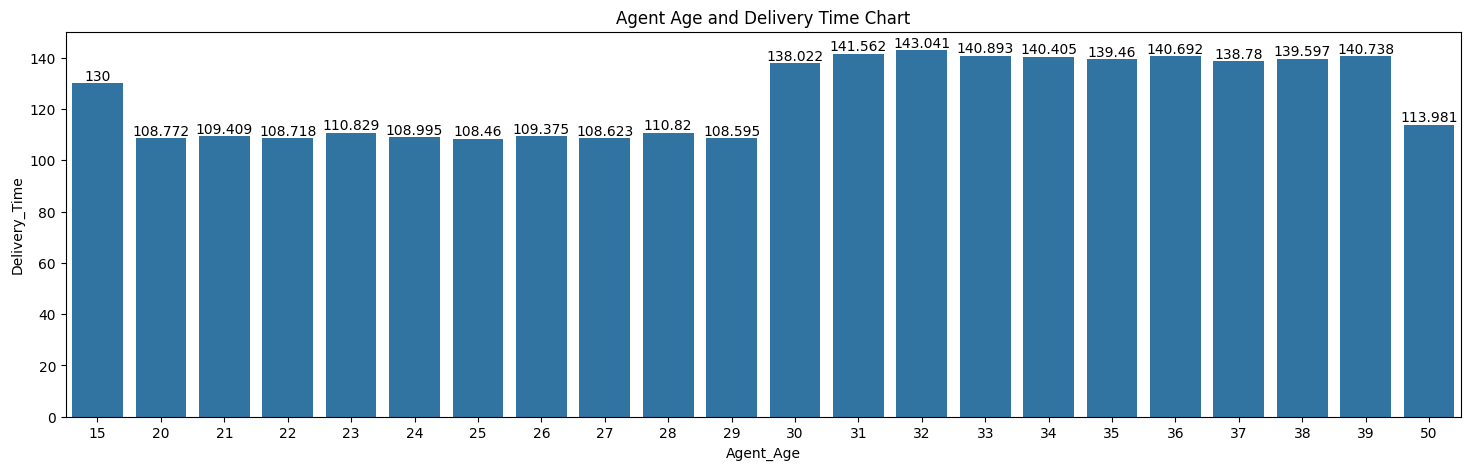

In [22]:
plt.figure(figsize=(18,5))
ax = sns.barplot(x='Agent_Age', y='Delivery_Time', data=df, ci=None)
ax.bar_label(ax.containers[0])
plt.title('Agent Age and Delivery Time Chart')
plt.show()

Text(0.5, 1.0, 'Area Wise Sales')

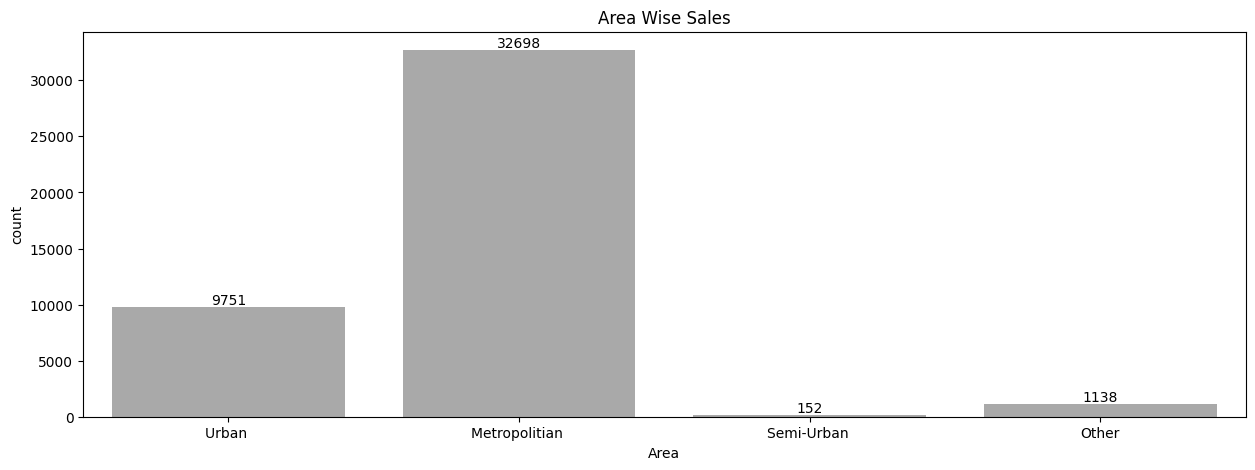

In [27]:
plt.figure(figsize=(15,5))
ax = sns.countplot(x='Area', data=df, color='darkgrey')
ax.bar_label(ax.containers[0])
plt.title('Area Wise Sales')

Text(0.5, 1.0, 'Agent Age Vs Agent Rating')

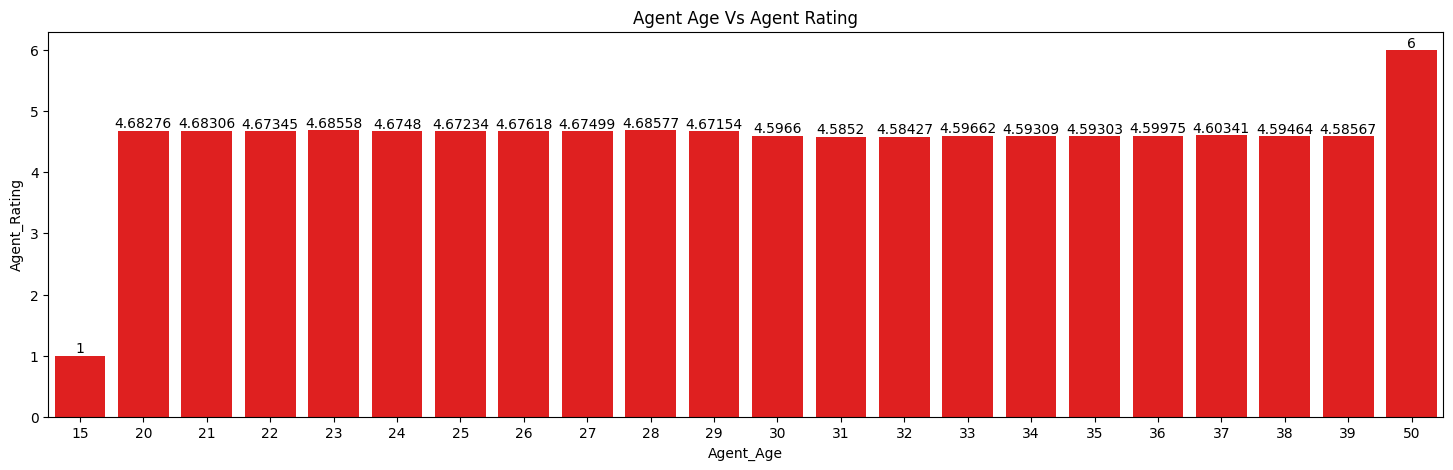

In [39]:
plt.figure(figsize=(18,5))
ax = sns.barplot(x='Agent_Age', y='Agent_Rating', data=df, ci=None, color='red')
ax.bar_label(ax.containers[0])
plt.title('Agent Age Vs Agent Rating')

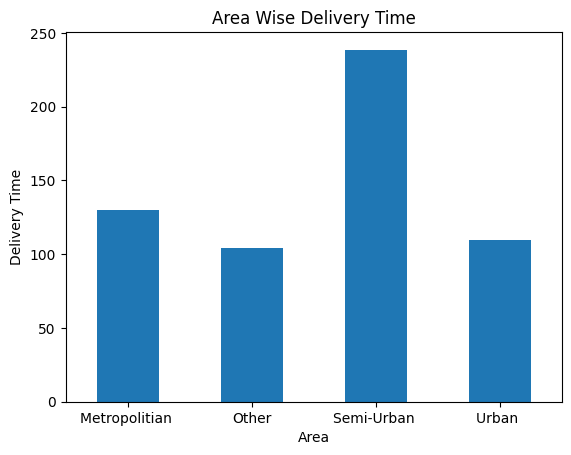

In [44]:
deliveryTime = df.groupby('Area')['Delivery_Time'].mean()
deliveryTime.plot(kind='bar')
plt.xlabel('Area')
plt.ylabel('Delivery Time')
plt.title('Area Wise Delivery Time')
plt.tick_params(axis='x', rotation=0)

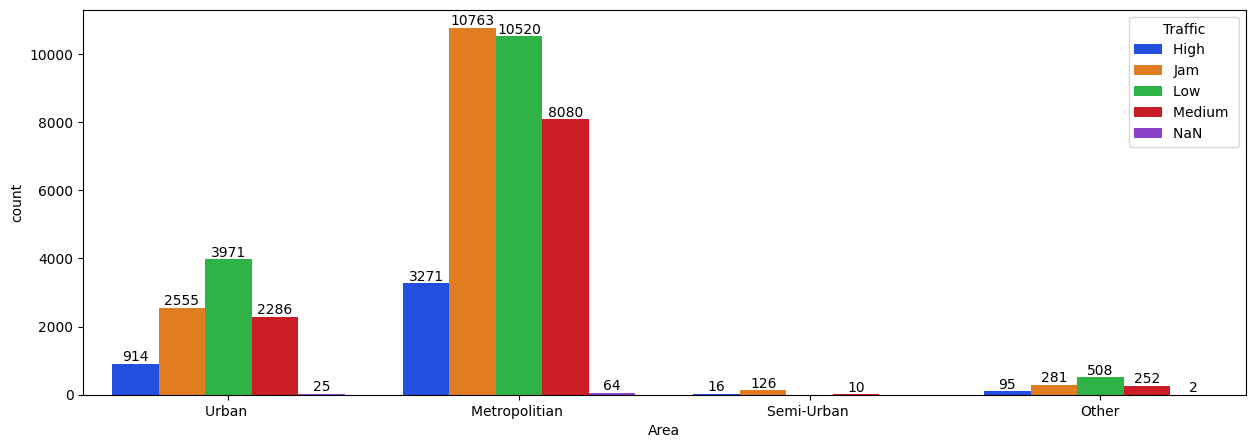

In [62]:
plt.figure(figsize=(15,5))
ax = sns.countplot(x='Area', data=df, hue='Traffic', palette='bright')
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
ax.bar_label(ax.containers[2])
ax.bar_label(ax.containers[3])
ax.bar_label(ax.containers[4])
plt.show()

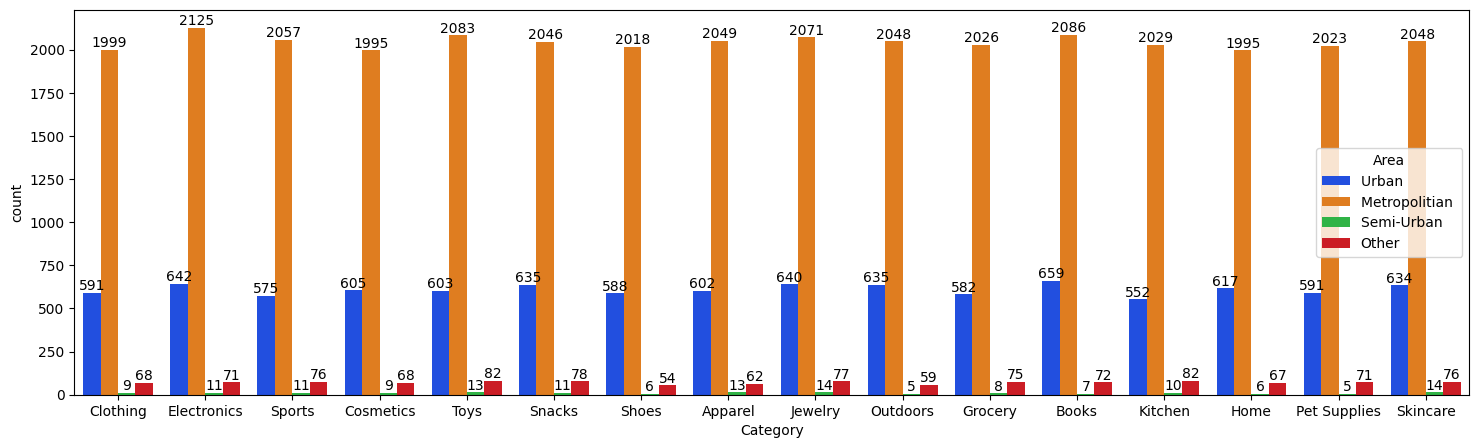

In [69]:
plt.figure(figsize=(18,5))
ax = sns.countplot(x='Category', data=df, hue='Area', palette='bright')
for i in range(0,4):
  ax.bar_label(ax.containers[i])
plt.show()